<a href="https://colab.research.google.com/github/pinilDissanayaka/Telecom-Customer-Churn-prediction/blob/main/Scripts/%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
pip install Catboost

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [126]:
FIGPATH = '/content/Figures'

In [127]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [128]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [129]:
df.shape

(7043, 21)

This dataset contain 7043 rows and 21 columns.


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [131]:
allColumns = df.columns
catColumns = df.select_dtypes(include=['object']).columns
numColumns = list(set(allColumns) - set(catColumns))



print(f"All columns : {list(allColumns)} \n")
print(f"Categorical columns :  {list(catColumns)} \n")
print(f"Numeric columns : {list(numColumns)} \n")

All columns : ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'] 

Categorical columns :  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'] 

Numeric columns : ['MonthlyCharges', 'SeniorCitizen', 'tenure'] 



In [132]:
df.duplicated().sum()

0

This dataset doesn't contain duplicate values.


In [133]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

This dataset doesn't contain any NA values.



In [134]:
print("Statistical summary of the DataFrame:")
df.describe().T

Statistical summary of the DataFrame:


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [135]:
for column in allColumns:
  print(f"\n{column} column contain :\n")
  print(f"data type of {column} : {df[column].dtype}")
  print(f"{df[column].unique()}\n")
  print(f"{df[column].value_counts()}\n")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------")


customerID column contain :

data type of customerID : object
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

gender column contain :

data type of gender : object
['Female' 'Male']

Male      3555
Female    3488
Name: gender, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

SeniorCitizen column contain :

data type of SeniorCitizen : int64
[0 1]

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

---------------------------------------

In [136]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0 : 'No', 1 : 'Yes'})

In [137]:
for column in allColumns:
  print(f"\n{column} column contain :\n")
  print(f"data type of {column} : {df[column].dtype}")
  print(f"{df[column].unique()}\n")
  print(f"{df[column].value_counts()}\n")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------")


customerID column contain :

data type of customerID : object
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

gender column contain :

data type of gender : object
['Female' 'Male']

Male      3555
Female    3488
Name: gender, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

SeniorCitizen column contain :

data type of SeniorCitizen : object
['No' 'Yes']

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

---------------------------

TotalCharges column has some ' ' values. Let make them as a NA values and convert it as a numeric column.

In [138]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [139]:
for column in allColumns:
  print(f"\n{column} column contain :\n")
  print(f"data type of {column} : {df[column].dtype}")
  print(f"{df[column].unique()}\n")
  print(f"{df[column].value_counts()}\n")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------")


customerID column contain :

data type of customerID : object
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

gender column contain :

data type of gender : object
['Female' 'Male']

Male      3555
Female    3488
Name: gender, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

SeniorCitizen column contain :

data type of SeniorCitizen : object
['No' 'Yes']

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

---------------------------

In [140]:
allColumns = df.columns
catColumns = df.select_dtypes(include=['object']).columns
numColumns = list(set(allColumns) - set(catColumns))



print(f"All columns : {list(allColumns)} \n")
print(f"Categorical columns :  {list(catColumns)} \n")
print(f"Numeric columns : {list(numColumns)} \n")

All columns : ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'] 

Categorical columns :  ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] 

Numeric columns : ['TotalCharges', 'MonthlyCharges', 'tenure'] 



In [141]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now TotalCharges column has 11 null values.

In [142]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [143]:
print(f"It is a {df['TotalCharges'].isnull().sum() / df.shape[0] * 100} % from the distribution.")

It is a 0.1561834445548772 % from the distribution.


In [144]:
#Impute NA values with its mean value.
df['Imputed_TotalCharges_by_mean'] = df['TotalCharges'].fillna(value=df['TotalCharges'].mean())

In [145]:
#Impute NA values with random sample value.
sample = df['TotalCharges'].sample(df['TotalCharges'].isnull().sum(), random_state = 5)
sample.index = df[df['TotalCharges'].isnull()].index

sample

488      288.05
753     1641.30
936     3605.20
1082     163.70
1340     702.00
3331    2287.25
3826     475.70
4380      90.55
5218     654.85
6670    1129.35
6754    2117.25
Name: TotalCharges, dtype: float64

In [146]:
df['Imputed_TotalCharges_by_random'] = df['TotalCharges'].fillna(value=sample)

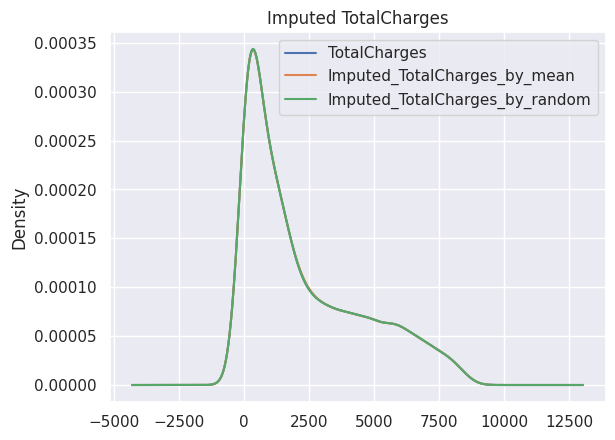

In [147]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['TotalCharges'].plot(kind='kde', ax = ax)
df['Imputed_TotalCharges_by_mean'].plot(kind='kde', ax = ax)
df['Imputed_TotalCharges_by_random'].plot(kind='kde', ax = ax)
lines, lables = ax.get_legend_handles_labels()
ax.legend(lines, lables, loc='best')
plt.title("Imputed TotalCharges")
plt.savefig(os.path.join(FIGPATH, "Imputed_TotalCharges.png"))
plt.show()

In [148]:
df.drop(columns=['customerID', 'TotalCharges'], inplace =True)

In [149]:
df.isnull().sum()

gender                            0
SeniorCitizen                     0
Partner                           0
Dependents                        0
tenure                            0
PhoneService                      0
MultipleLines                     0
InternetService                   0
OnlineSecurity                    0
OnlineBackup                      0
DeviceProtection                  0
TechSupport                       0
StreamingTV                       0
StreamingMovies                   0
Contract                          0
PaperlessBilling                  0
PaymentMethod                     0
MonthlyCharges                    0
Churn                             0
Imputed_TotalCharges_by_mean      0
Imputed_TotalCharges_by_random    0
dtype: int64

In [150]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Imputed_TotalCharges_by_mean,Imputed_TotalCharges_by_random
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,29.85,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,No,1889.50,1889.50
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,108.15,108.15
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No,1840.75,1840.75
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,151.65,151.65


In [151]:
df.shape

(7043, 21)

Now dataset contain 7043 rows and 21 columns.

In [152]:
allColumns = df.columns
catColumns = df.select_dtypes(include=['object']).columns
numColumns = list(set(allColumns) - set(catColumns))


print(f"")
print(f"All columns : {list(allColumns)} \n")
print(f"Categorical columns :  {list(catColumns)} \n")
print(f"Numeric columns : {list(numColumns)} \n")


All columns : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn', 'Imputed_TotalCharges_by_mean', 'Imputed_TotalCharges_by_random'] 

Categorical columns :  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] 

Numeric columns : ['Imputed_TotalCharges_by_mean', 'MonthlyCharges', 'tenure', 'Imputed_TotalCharges_by_random'] 



In [153]:
for column in allColumns:
  print(f"\n{column} column contain :\n")
  print(f"data type of {column} : {df[column].dtype}")
  print(f"{df[column].unique()}\n")
  print(f"{df[column].value_counts()}\n")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------")


gender column contain :

data type of gender : object
['Female' 'Male']

Male      3555
Female    3488
Name: gender, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

SeniorCitizen column contain :

data type of SeniorCitizen : object
['No' 'Yes']

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Partner column contain :

data type of Partner : object
['Yes' 'No']

No     3641
Yes    3402
Name: Partner, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Dependents column contain :

data type of Dependents : object
['No' 'Yes']

No     4933
Yes    2110
Name: Dep

In [156]:
df.nunique()

gender                               2
SeniorCitizen                        2
Partner                              2
Dependents                           2
tenure                              73
PhoneService                         2
MultipleLines                        3
InternetService                      3
OnlineSecurity                       3
OnlineBackup                         3
DeviceProtection                     3
TechSupport                          3
StreamingTV                          3
StreamingMovies                      3
Contract                             3
PaperlessBilling                     2
PaymentMethod                        4
MonthlyCharges                    1585
Churn                                2
Imputed_TotalCharges_by_mean      6531
Imputed_TotalCharges_by_random    6530
dtype: int64

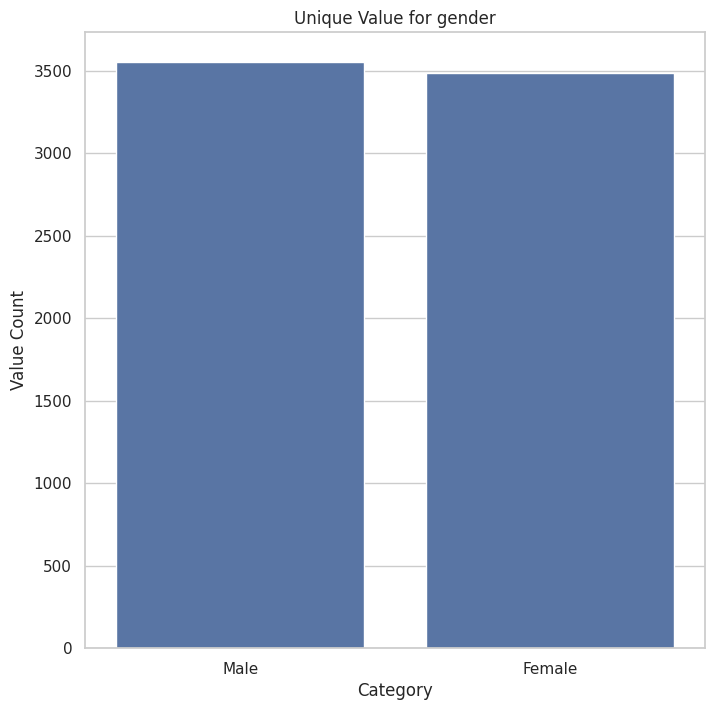

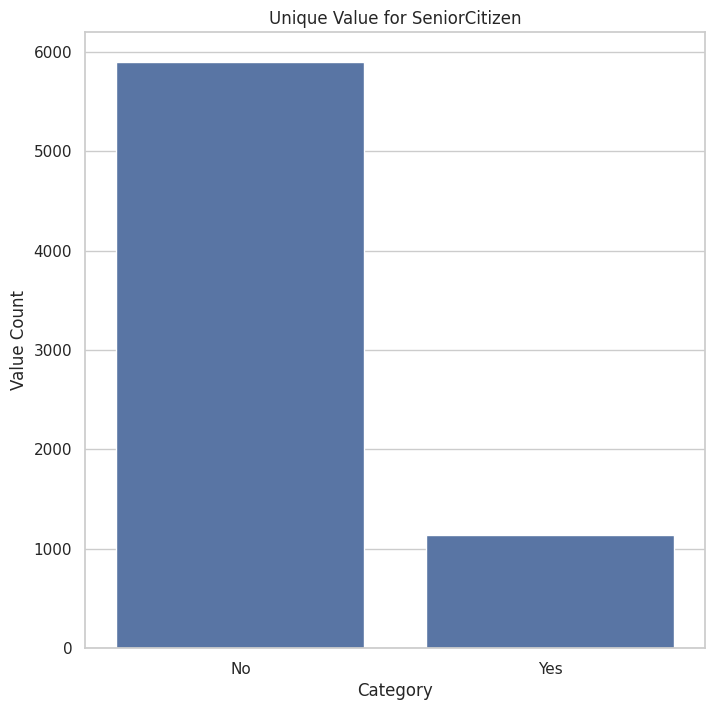

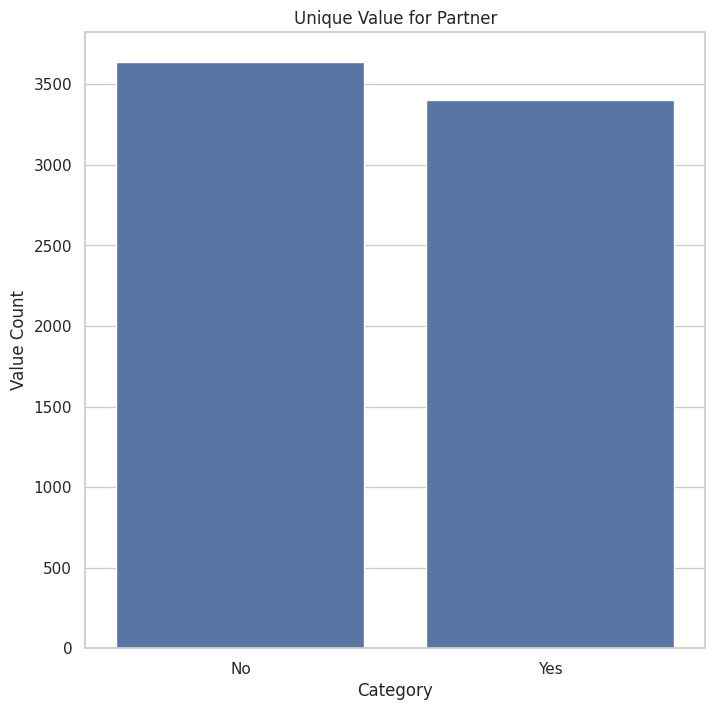

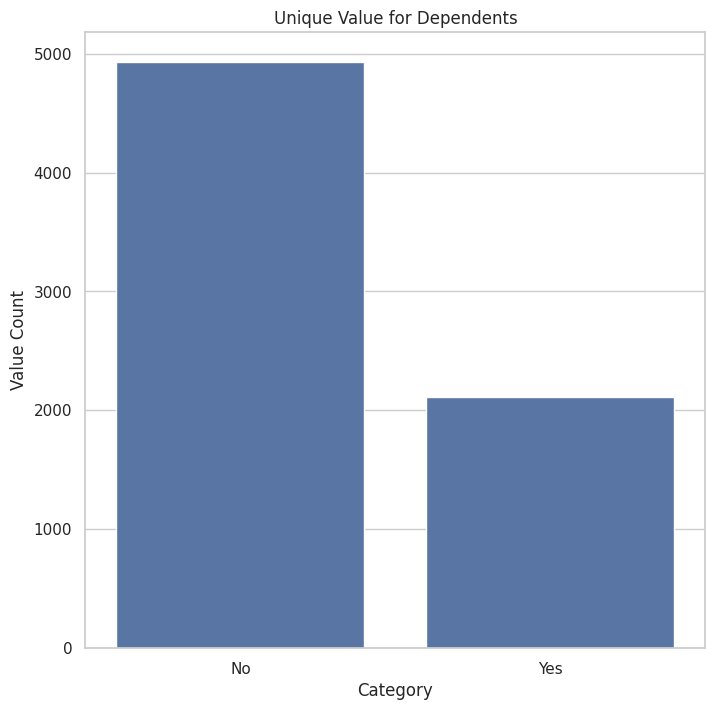

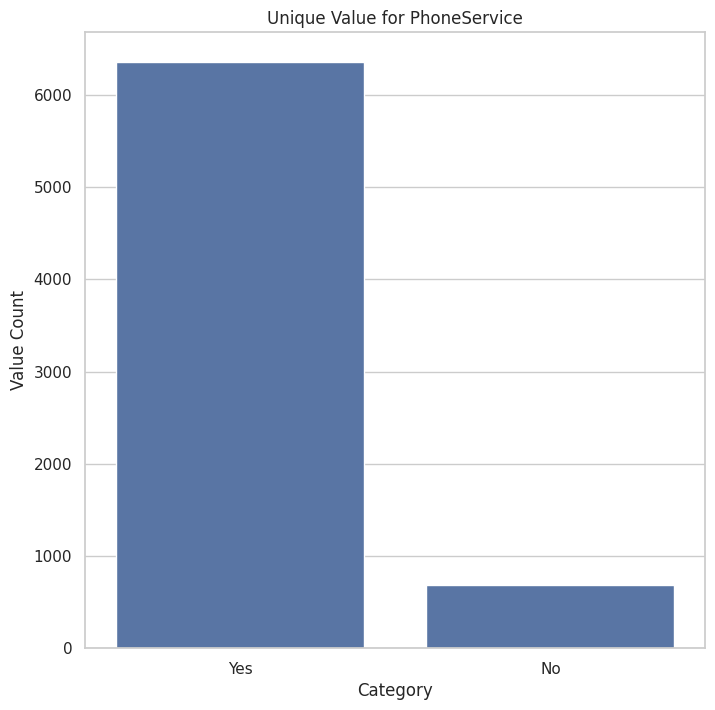

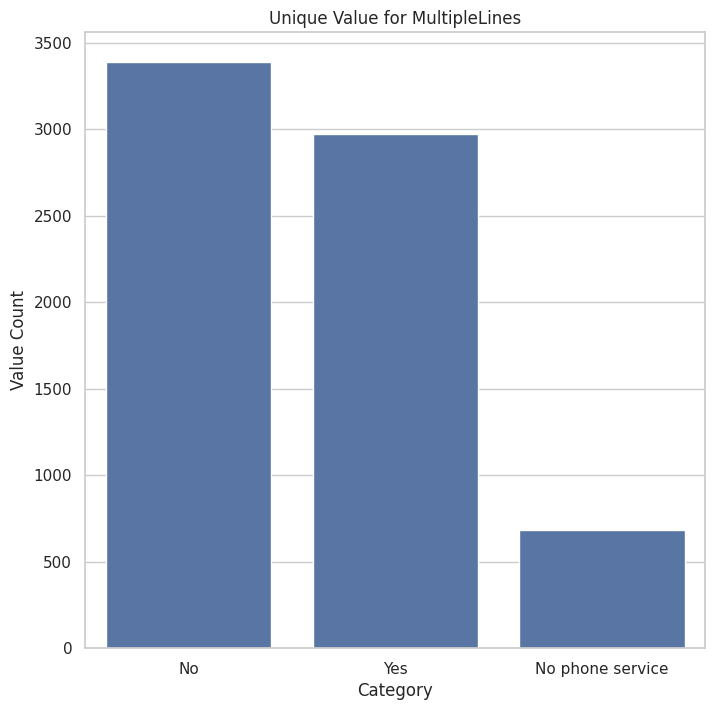

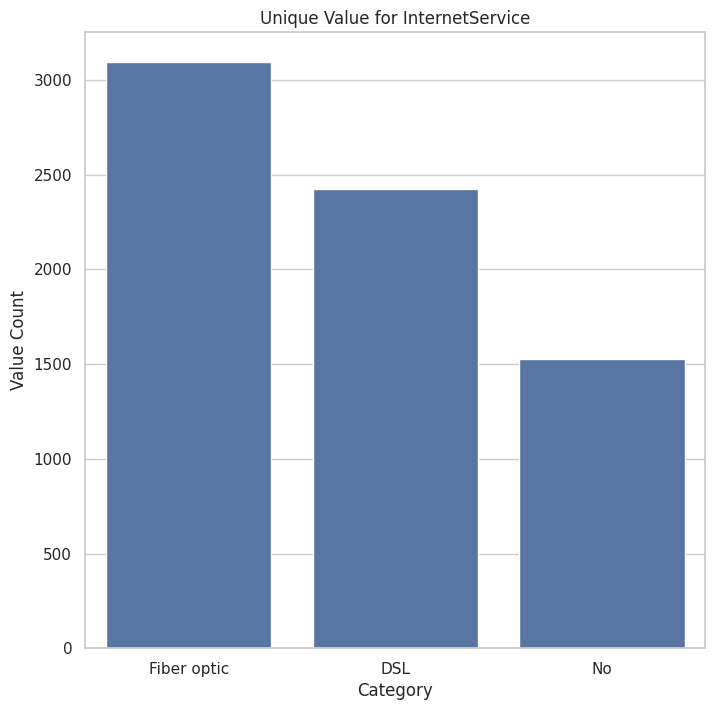

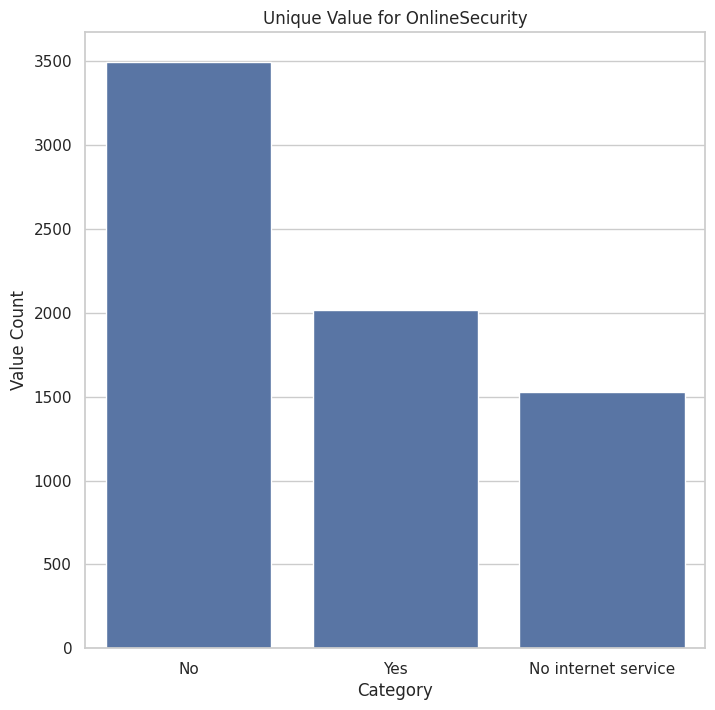

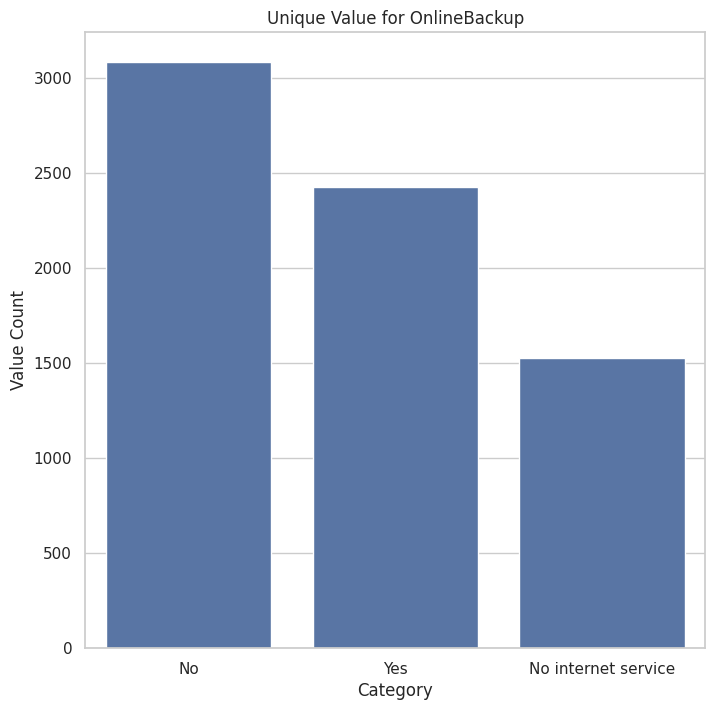

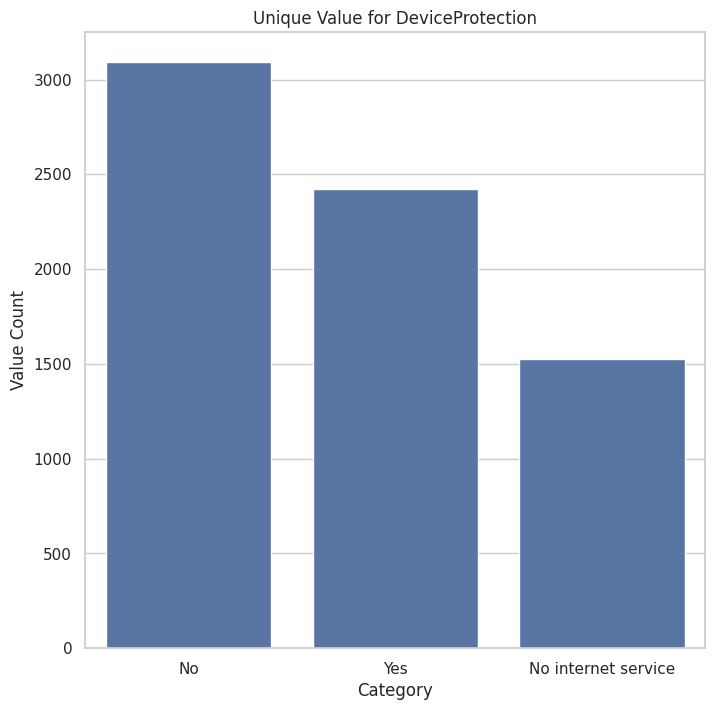

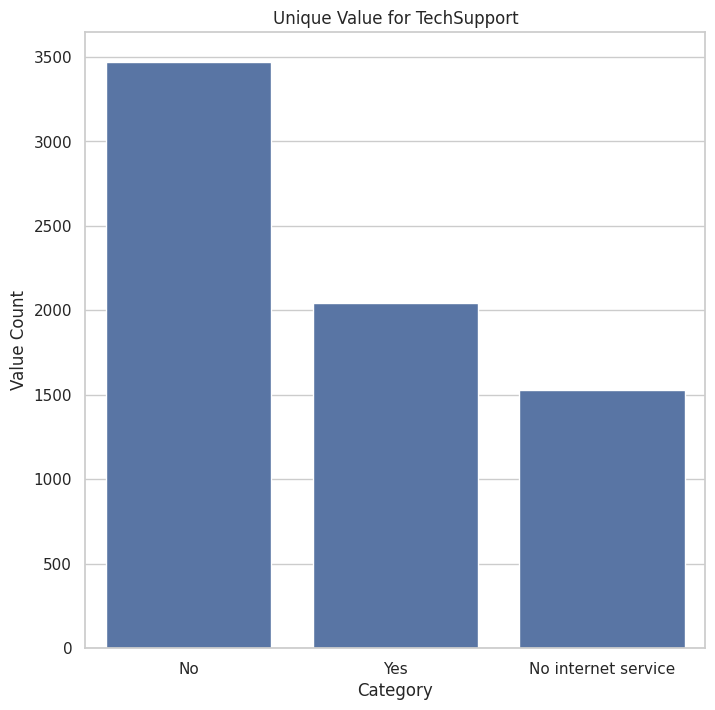

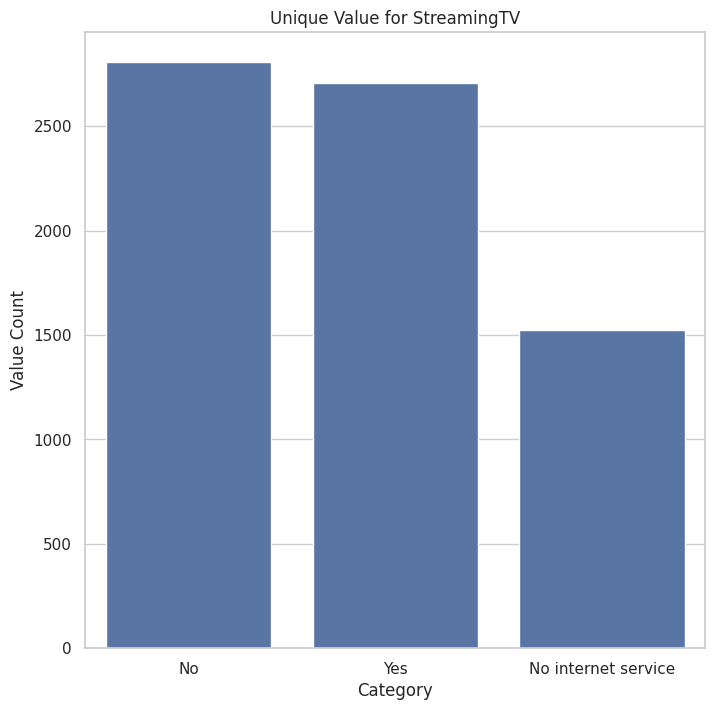

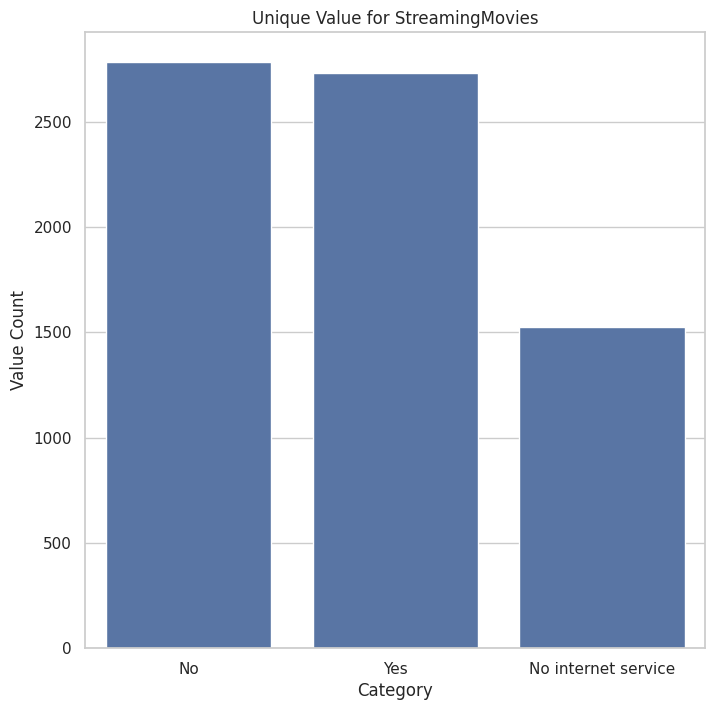

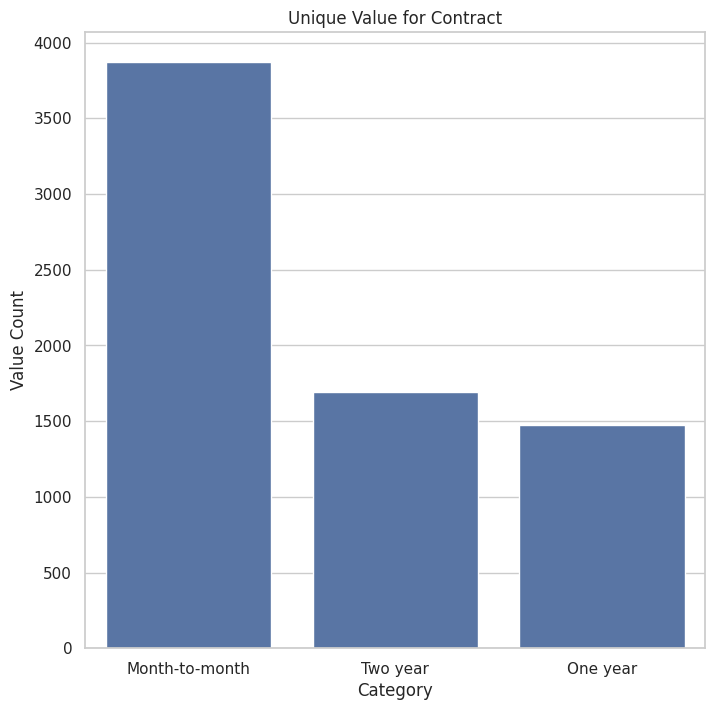

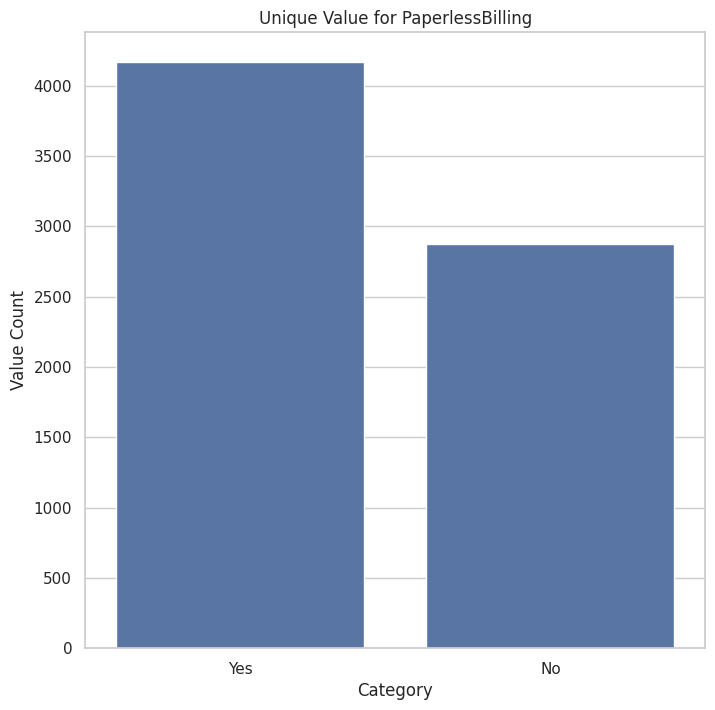

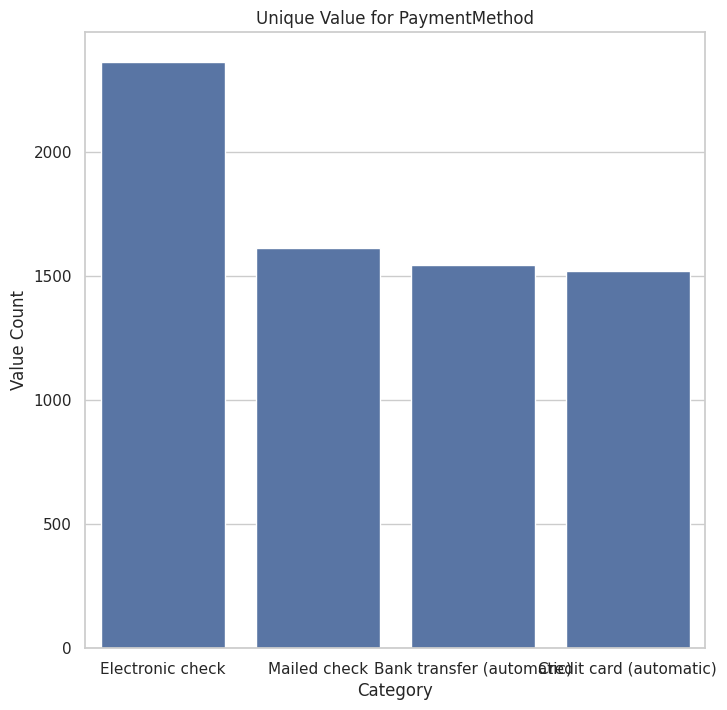

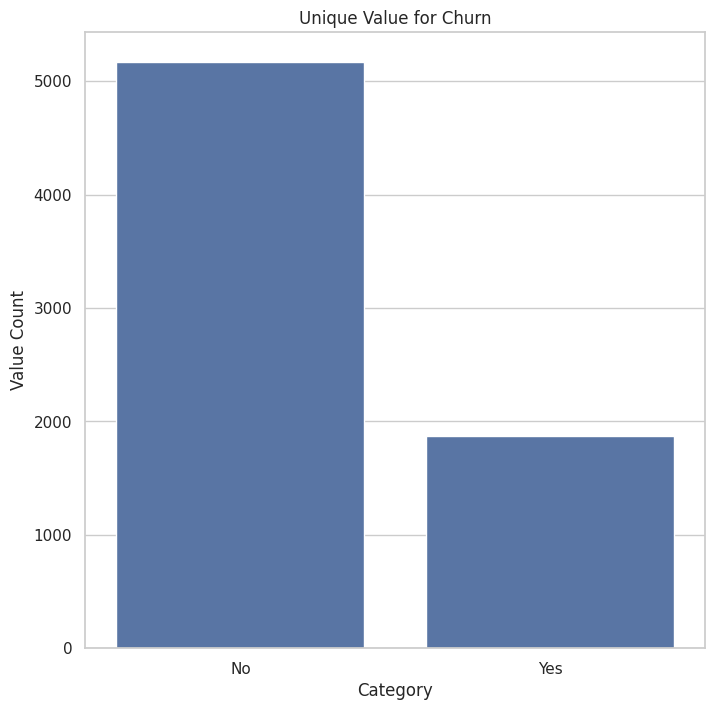

In [218]:
# Plotting graphs for each categorical column
for column in catColumns:
  valueCount = df[column].value_counts()
  plt.figure(figsize = (8, 8))
  plt.title(f'Unique Value for {column}')
  plt.xlabel('Category')
  plt.ylabel('Value Count')
  sns.barplot(x = valueCount.index, y = valueCount.values)
  plt.savefig(os.path.join(FIGPATH, f"Unique Value for {column}.png"))
  plt.show()